 # Lecture 2: Bayes’ Rule
 
 ## Instructor: Dr. Hu Chuan-Peng  
 
 ## Part 1: 单一事件的贝叶斯模型

**“假新闻”**

《柯林斯词典》将“假新闻”列为2017年度词汇。虚假新闻随着在线新闻和社交媒体平台的出现而激增，这些平台允许用户在几乎没有质量控制的情况下发布文章。因此，帮助读者将文章标记为“真实”或“虚假”变得越来越重要。

我们将探索贝叶斯哲学如何帮助我们区分不同性质的文章。为此，我们将对发布在Facebook上的150篇文章进行抽样调查，这些文章由五名BuzzFeed记者进行了事实核查。

### 先验

**获得先验概率**

通过查看数据集，我们可以发现这份数据集中，40%的报道是假新闻，60%的报道是事实。

In [ ]:
# 查看数据集中假新闻与事实报道的比例
fake_news %>% 
  tabyl(type) %>% 
  adorn_totals("row")
  type   n percent
  fake  60     0.4
  real  90     0.6
 Total 150     1.0

**进一步获取数据(data)**

但这个信息只考虑了事实报道和虚假新闻的比率，只凭借这一简单的比率信息，我们仍然可能阅读大量的假新闻而不自知。该比率信息并没有帮助我们总结出二者的特征。

假设有一篇新发布的文章，其标题为：“总统有一个有趣的秘密！”这个标题使用了奇怪的惊叹号，因为在事实报道中，使用惊叹号并不常见。我们的数据也支持这一点，通过查看数据集可发现，26.67%（16/60）的假新闻标题使用感叹号，但只有2.22%（2/90）的真实新闻标题使用惊叹号：

In [ ]:
# 查看数据集中，假新闻与事实报道使用惊叹号的比例
fake_news %>% 
  tabyl(title_has_excl, type) %>% 
  adorn_totals("row")
 title_has_excl fake real
          FALSE   44   88
           TRUE   16    2
          Total   60   90

**先验 vs 数据**

现在，我们获得了两种信息：先验信息(prior)表明大部分的报道是事实(60%)，而惊叹号数据(data)表明使用惊叹号的更可能是假新闻(26.67%)，根据贝叶斯学派的思想，在我们做出推断之前，我们需要对这两种信息进行权衡。（插图）、


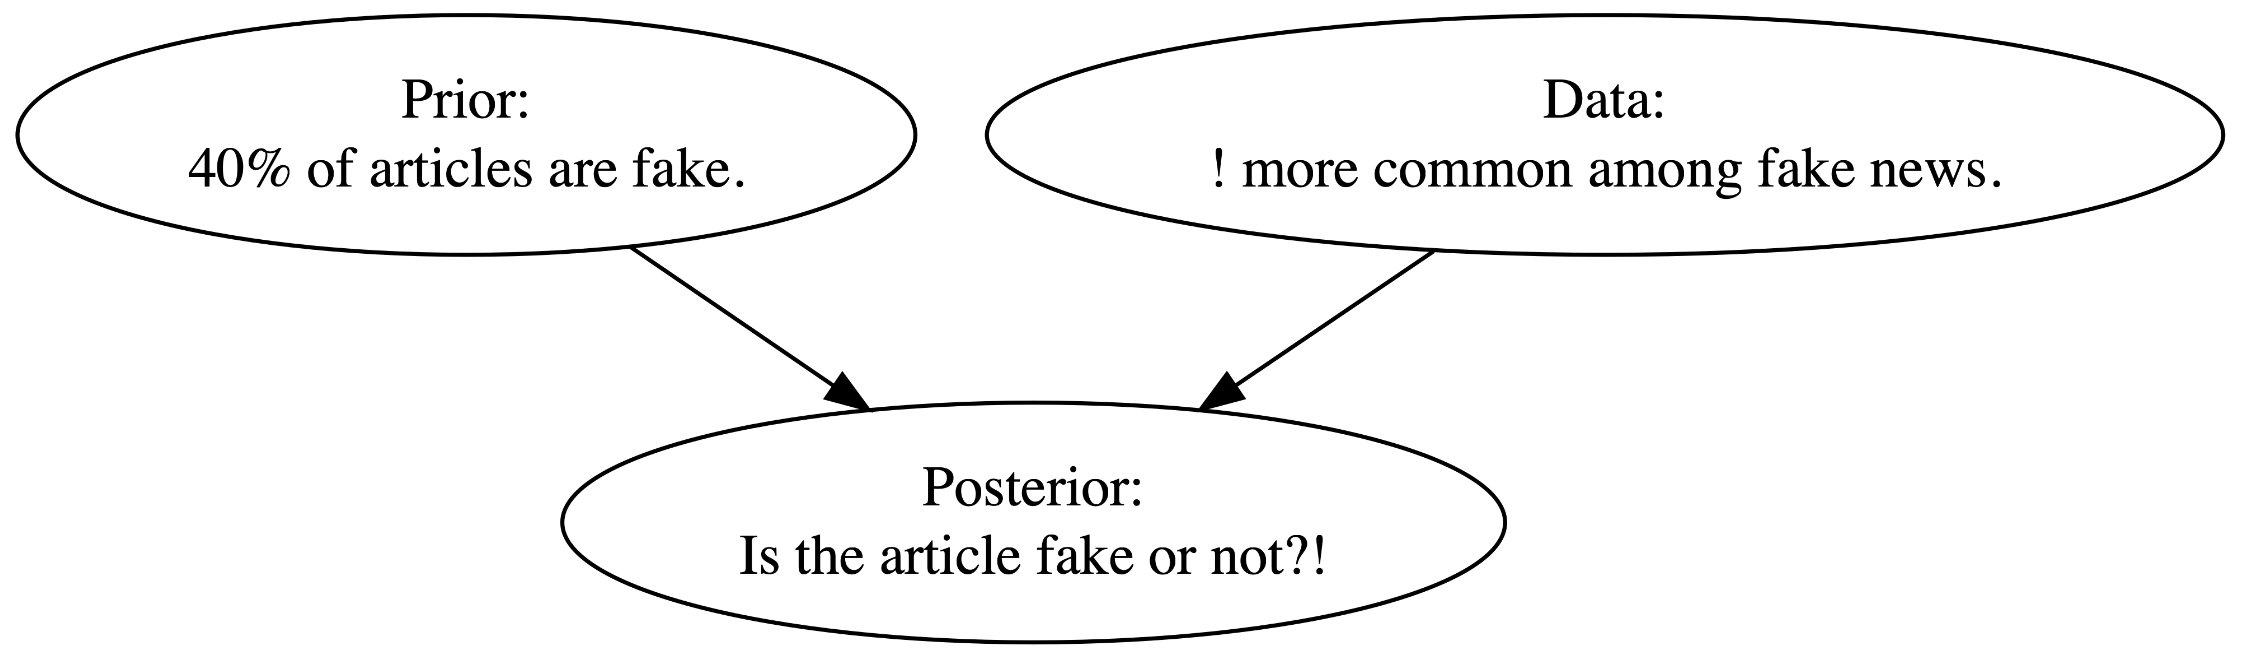

### 先验概率模型(Prior probability model)

首先，我们将对一篇文章为事实报道或假新闻的概率进行形式化

**$P(B) = 0.40$**

**$P(B^{c}) = 0.60$**

$B$表示一篇报道为假新闻的概率，$B^{c}$则表示一篇报道非假新闻的概率($B^{c}:B$ complement)

| 事件	    |$B$         |$B^{c}$ |Total|  
|---------- |------------|--------|-----|  
|probability|0.4         |0.6     |1    |

**$P(B)$** 和 **$P(B^{c})$** 为假新闻的先验模型(prior model)

作为一个有效的概率模型(valid probability model)，它必须：

（1）考虑所有可能的事件（所有文章都必须是假的或真的）；

（2）它为每个事件分配先验概率；

（3）这些概率加起来为1。

### 条件概率&似然

**形式化数据结果**

在第二步中，我们将对数据结果(data)进行形式化。

我们从标题带有感叹号新闻的数据中得知，如果一篇报道是假新闻，其标题出现感叹号的概率是26.67%；如果一篇报道为事实，其标题出现感叹号的概率是2.22%。所以感叹号的出现依赖于报道的性质，或者可以说以报道的性质为前提条件。

我们可以用条件概率的形式来表示感叹号出现的可能性。
$$
P(A|B) = 0.2667
$$
$$
P(A|B^{c}) = 0.0222
$$

#### 条件概率
条件概率表示为P（A|B），表示“A在B发生的条件下发生的概率”

在贝叶斯统计中，条件概率是一个非常关键的概念。P(A|B)与P(A)的对比，表示事件B的发生如何影响我们对事件A的认知

1. 在一些时候，事件B发生可能使得事件A发生的可能性增加，例如，每天练习单簧管的人加入管弦乐队的概率高于一般人群，即：
$$
P(加入管弦乐队|练习) > P(加入管弦乐队)
$$

2. 而有些时候，事件B的发生则可能使得事件A发生的可能性降低，例如，如果你每天洗手，那么你得流感的几率可能小于一般人群，即：
$$
P(得流感|洗手) < P(得流感)
$$

3. 并且注意$P(A|B) \neq P(B|A)$ \
比如，所有的小狗都是可爱的，但可爱的却不一定全是小狗
$$
P(可爱的|小狗) = 1
$$

$$
P(小狗|可爱的) < 1
$$

4. 当A与B相互独立时，B的发生则不会影响我们对A事件的认知
$$
P(A|B) = P(A)
$$

#### 似然(likelihood)

**似然的定义**

回到感叹号新闻标题的例子，我们所获得的数据(data)只是告诉我们这篇文章的标题出现了感叹号，而根据条件概率的信息可知，$P(A|B) = 0.2667，P(A|B^{c}) = 0.0222$，标题含有感叹号的文章更可能(more likely)是假新闻。

也就是说，我们知道当前的数据更可能在某一种假设下出现。在这个例子中，我们比较不同假设下当前数据出现的可能性
$P(A|B) = 0.2667 > P(A|B^{c}) = 0.0222$ 来确定当前数据在不同假设下发生的相对可能性

--------------------------------------------------------------------

这就是似然函数(likelihood function)的含义，它表明了数据A在各种假设下出现的概率，它是一系列条件概率的组合

如针对“数据A:新闻标题含有感叹号” 的似然函数可以写成：$L(·|A)$
$$
L(B|A) = P(A|B) \quad\quad L(B^{c}|A) = P(A|B^{c})
$$
这表明了标题含有感叹号在“假新闻”与“事实报道”这两种假设下出现的概率

*注意，在似然函数中，数据是已知发生的，而假设是可能发生的


**概率 vs 似然**

当假设$B$是已知的，条件概率函数$P(·|B)$允许我们比较在假设$B$发生的前提下，各种可能事件$A$或$A^{c}$发生的概率。

当事件$A$已经发生，似然函数$L(·|A)= P(A|·)$允许我们比较在各种假设$B$或$B^{c}$下，事件$A$发生的概率。

下表对以上的信息做了一个总结，注意：
* 先验概率的总和等于1
* 似然总和不等于1
似然函数并不是概率函数(likelihood function is not a probability function),因为它告诉我们事件A在不同假设下发生的相对可能性，在这里$L(B|A) > L(B^{c}|A)$
![Alt text](image-3.png)

### 分母（normalizing constant）

**边际概率**

似然函数有效总结了在真假新闻中的感叹号使用，但我们仍然需要得知，在所有新闻标题中使用感叹号的概率如何。这被称为边际概率(marginal probability) $P(A)$

所有新闻标题中使用惊叹号的概率可被分为两部分：

(1)假新闻的标题出现感叹号，即$P(A\cap B)$

(2)事实报道的标题出现感叹号$P(A\cap B^{c})$

待补：一堆计算公式

### 后验概率模型(Posterior probability model via Bayes’ Rule)

**直觉理解**

现在，我们来计算后验概率，即标题使用感叹号的这篇文章是假新闻的概率$P(B|A)$，在正式计算之前，我们可以回顾一下这个表格来建立一些直觉

因为这篇文章标题使用了感叹号，所以我们直接锁定A行，在A行中，88.9%(0.1067/0.12)的文章为假新闻，11.1%(0.0133/0.12)的文章为事实。因此有88.9%的后验概率认为当前这一文章属于假新闻。

![Alt text](image-5.png)

**正式计算**

待补：计算公式

### 后验模拟(Posterior probability model via Bayes’ Rule)

1. 定义文章类型与相应的先验概率

In [ ]:
# Define possible articles
article <- data.frame(type = c("real", "fake"))

# Define the prior model
prior <- c(0.6, 0.4)

2. 模拟一些可能被投放到你面前的文章

In [ ]:
# Simulate 10000 articles. 
set.seed(84735)
article_sim <- sample_n(article, size = 10000, 
                        weight = prior, replace = TRUE)

In [ ]:
#我们可以通过画图来查看这些被投放的文章中，事实报道和假新闻的比例。
ggplot(article_sim, aes(x = type)) + 
  geom_bar()

3. 接下来我们需要模拟10000篇新闻标题的感叹号使用情况，和前面一样，假新闻使用感叹号的可能性为26.67% ，事实报道使用感叹号的可能性为2.22% 

In [ ]:
article_sim <- article_sim %>% 
  mutate(data_model = case_when(type == "fake" ~ 0.2667,
                                type == "real" ~ 0.0222))

# Define whether there are exclamation points
data <- c("no", "yes")

# Simulate exclamation point usage 
set.seed(3)
article_sim <- article_sim %>%
  group_by(1:n()) %>% 
  mutate(usage = sample(data, size = 1, 
                        prob = c(1 - data_model, data_model)))

article_sim %>% 
  tabyl(usage, type) %>% 
  adorn_totals(c("col","row"))
 usage fake real Total
    no 2961 5833  8794
   yes 1070  136  1206
 Total 4031 5969 10000

似然：由以上结果可知，大约28%(1070/4731)的假新闻标题使用了感叹号，2%的事实报道使用了感叹号(136/5669)

分母：在10000篇新闻中，标题使用感叹号的有1206篇(分母)

而现在，我们可以知道，在使用感叹号标题的文章中，88.7%的文章为假新闻，

In [ ]:
article_sim %>% 
  filter(usage == "yes") %>% 
  tabyl(type) %>% 
  adorn_totals("row")
  type    n percent
  fake 1070  0.8872
  real  136  0.1128
 Total 1206  1.0000

同样地，通过画图来可视化真假新闻中感叹号的使用情况

In [ ]:
ggplot(article_sim, aes(x = type, fill = usage)) + 
  geom_bar(position = "fill")
ggplot(article_sim, aes(x = type)) + 
  geom_bar()

## Part2 随机变量的贝叶斯模型

在上面的贝叶斯分析中，我们针对单一事件“新闻的类型”，

### 先验概率模型(**Prior** probability model)

一个棋手对战机器的例子：
棋手Kasparov打败机器“深蓝”的可能性$\pi$分别为：0.2，0.5，0.8，这里的$\pi$为随机变量。

像假新闻分析中一样，我们可以给这些随机变量$\pi$建立先验模型

该模型需要满足：
1. 确定$\pi$的可能取值
2. 为每个值分配一个先验概率
3. 这些概率之和为1


| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.4  |0.6 |1   |1|


注：

* 这里的模型对现实进行了简化，按理来说棋手的胜率可以取0-1中的任何值，但这里胜率只有三个值 0.2，0.5，0.8

* 表格中的第二行显示了每个可能取值$\pi$的先验概率，这又被称为概率质量函数(probability mass function (pmf))


**概率质量密度函数(pmf)：** 用来描述离散型随机变量在各特定取值上的概率

对于离散型随机变量$Y$，$Y$各取值的概率由$f(y)$指定：
$$
f(y) = P(Y=y)
$$

并且有如下性质：

* 对所有y的取值来说，$0\leq f(y) \leq 1$
* $\sum_{all\,\pmb{y}}f(y) = 1$，y取值的所有概率之和为1

### 二项式数据模型(The Binomial **data** model)

第二步，我们需要收集比赛的数据结果。我们的数据$Y$是在1997年的6场比赛中，Kasparov的获胜次数。

$Y$可以取{0,1,...,6}中的任意值，并且$Y$的取值受到$\pi$的影响，试想如果$\pi$为0.8，意味着Kasparov的胜率很高，那么$Y$的取值也会偏高。我们同样可以用条件概率公式来表明这一点：

$$
f(y|\pi) = P(Y=y|\pi)
$$

* 对所有y的取值来说，$0\leq f(y|\pi) \leq 1$
* $\sum_{all\,\pmb{y}}f(y|\pi) = 1$
--------------------------------------------------------------------

我们提出以下两个假设：

（1）任何比赛的结果都互不影响

（2）Kasparov在每场比赛中的胜率都是相同的

在这两个前提下，我们可以使用**二项模型**来对Kasparov的比赛结果进行拟合

**二项模型**

$$
f(y|\pi) = \binom{n}{y} \pi^{y}(1-\pi)^{n-y} \quad\quad for\;y \in \{0,1,2,...,n\}
$$

 $\binom{n}{y} = \frac{n!}{y!(n-y)!}$

在n=6的比赛中，Kasparov的获胜次数与胜率的关系符合二项模型

$$
Y|\pi \sim Bin(6,\pi)
$$

conditional pmf

$$
f(y|\pi) = \binom{6}{y} \pi^{y}(1-\pi)^{6-y} \quad\quad for\;y \in \{0,1,2,3,4,5,6\} 
$$


这个概率质量密度函数总结了在特定胜率$\pi$下观察到获胜次数$Y=y$的条件概率

例如，当Kasparov的胜率为0.8时，他赢下全部6场的可能性大约为0.26

$$
f(y=0.6|\pi=0.8) = \binom{6}{6} 0.8^{6}(1-0.8)^{6-6} = 1\times0.8^{6}\times1 \approx 0.26
$$

而输掉全部6场比赛的可能性则接近为0

$$
f(y=0|\pi=0.8) = \binom{6}{0} 0.8^{0}(1-0.8)^{6-0} = 1\times0.2^{6}\times1 \approx 0.000064
$$

下图画出了几种$f(y|\pi)$，即在不同胜率$\pi$下，不同获胜次数$Y$发生的可能性

![Alt text](image.png)

In [ ]:
画图

### 二项似然函数(The Binomial likelihood function)

现在，如果我们得知Kasporov在6场比赛中只获胜了1次，我们可以思考在众多可能的胜率中，哪一个更可能产生我们当前的数据结果。换言之，我们想知道在每个可能的胜率/pi下，6场比赛只获胜1次的似然(likelihood)。

![Alt text](image-8.png)

In [ ]:
画图

获胜次数为1时的似然函数

$$
L(\pi|y=1) = f(y=1|\pi) = \binom{6}{1} \pi^{1}(1-\pi)^{6-1} = 6\pi(1-\pi)^{5}
$$

比如当胜率为0.8时，出现获胜次数为1的可能性是：
$$
L(\pi=0.8|y=1) = 6\times0.8\times(1-0.8)^{5}\approx 0.0015
$$


**注意：**

似然函数表示的是，在各种可能的胜率$\pi$下,获胜次数$Y=1$的可能性，所以

(1)该似然函数公式只取决于$\pi$

(2)似然函数的总和加起来不为1（从条件概率的公式来看，似然函数的分母是不同的）


| $\pi$	        |0.2    |0.5    |0.8  
|---------------|-----  |----   |----|  
|$f(\pi \| y=1)$   |0.3932  |0.0938 |0.0015|


**conditional pmf VS likelihood function**

### 分母(Normalizing constant)

$$
f(y=1) = \sum_{\pi \in\{0.2,0.5,0.8\}} L(\pi|y=1)f(\pi)
$$

![Alt text](image-1.png)

### 后验概率模型(Posterior probability model)

$$
posterior = \frac{ prior*likelihood} {normalizing constant}
$$

$$
f(\pi|y=1) = \frac{ f(\pi)L(\pi|y=1)} {f(y=1)} \quad\quad for\;\pi \in {0.2,0.5,0.8}
$$

$$
f(\pi=0.2|y=1) = \frac{0.10 \times 0.3932} {0.0637} \approx 0.617
$$
$$
f(\pi=0.5|y=1) = \frac{0.25 \times 0.0938} {0.0637} \approx 0.368
$$
$$
f(\pi=0.8|y=1) = \frac{0.65 \times 0.0015} {0.0637} \approx 0.015
$$


| $\pi$	        |0.2    |0.5    |0.8 |Total 
|---------------|-----  |----   |----|-----|
|$f(\pi)$   |0.10  |0.25 |0.65|1|
|$f(\pi \| y=1)$   |0.617  |0.368 |0.015|1|


### (Posterior shortcut)

计算分母只是为了进行标准化，让后验概率之和为1

也可以省略坟墓的计算，因为分母是一个概率值，即常数，那么我们可以让$f(y=1) = 1/c$来简化这个过程

后验的计算可写成：
$$
f(\pi=0.2|y=1) = c⋅ 0.10⋅0.3932 \propto 0.039320
$$

$$
f(\pi=0.5|y=1) = c⋅ 0.25⋅0.0938 \propto 0.023450
$$
$$
f(\pi=0.8|y=1) = c⋅ 0.65⋅0.0015 \propto 0.000975
$$

$\propto$ 表示成比例，尽管这些未经标准化的后验概率总和不等于1，但它们的比例关系并未改变(见下图)

![Alt text](image-9.png)

![Alt text](image-2.png)

**Proportionality**

既然$f(y)$是一个用来标准化的常数，它并不受$\pi$的影响，那么后验概率质量函数$f(\pi|y)$ 就与$f(\pi)$和$L(\pi|y)$成正比

$$
posterior \propto prior⋅ likelihood
$$

### Posterior simulation

In [ ]:
# Define possible win probabilities
chess <- data.frame(pi = c(0.2, 0.5, 0.8))

# Define the prior model
prior <- c(0.10, 0.25, 0.65)

In [ ]:
# Simulate 10000 values of pi from the prior
set.seed(84735)
chess_sim <- sample_n(chess, size = 10000, weight = prior, replace = TRUE)

In [ ]:
# Simulate 10000 match outcomes
chess_sim <- chess_sim %>% 
  mutate(y = rbinom(10000, size = 6, prob = pi))

# Check it out
chess_sim %>% 
  head(3)
   pi y
1 0.5 3
2 0.5 3
3 0.8 4

In [ ]:
# Summarize the prior
chess_sim %>% 
  tabyl(pi) %>% 
  adorn_totals("row")
    pi     n percent
   0.2  1017  0.1017
   0.5  2521  0.2521
   0.8  6462  0.6462
 Total 10000  1.0000

In [ ]:
# Plot y by pi
ggplot(chess_sim, aes(x = y)) + 
  stat_count(aes(y = ..prop..)) + 
  facet_wrap(~ pi)

In [ ]:
# Focus on simulations with y = 1
win_one <- chess_sim %>% 
  filter(y == 1)

# Summarize the posterior approximation
win_one %>% 
  tabyl(pi) %>% 
  adorn_totals("row")
    pi   n percent
   0.2 404 0.60389
   0.5 253 0.37818
   0.8  12 0.01794
 Total 669 1.00000

# Plot the posterior approximation
ggplot(win_one, aes(x = pi)) + 
  geom_bar()